-13.018089 70.574745


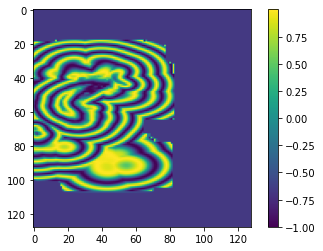

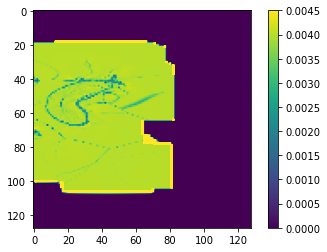

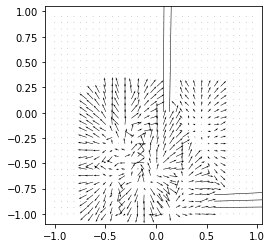

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

nps = 128
mean = np.reshape(np.fromfile('mean-eval.bin', dtype=np.float32), (-1,nps,nps,nps))[0]
mean = np.transpose(mean, (0, 2, 1))
print(mean.min(), mean.max())

X, Y, Z = np.mgrid[-1:1:128j, -1:1:128j, -1:1:128j]

plt.imshow(np.sin(mean[:,55,:] * 0.5))
plt.colorbar()
plt.show()

mean_dx = np.reshape(np.fromfile('mean-dx-eval.bin', dtype=np.float32), (-1,nps,nps,nps))[0]
mean_dy = np.reshape(np.fromfile('mean-dy-eval.bin', dtype=np.float32), (-1,nps,nps,nps))[0]
mean_dz = np.reshape(np.fromfile('mean-dz-eval.bin', dtype=np.float32), (-1,nps,nps,nps))[0]
mean_dx = np.transpose(mean_dx, (0, 2, 1))
mean_dy = np.transpose(mean_dy, (0, 2, 1))
mean_dz = np.transpose(mean_dz, (0, 2, 1))


grad_mag = np.sqrt(mean_dx**2 + mean_dy**2 + mean_dz**2)

plt.imshow(grad_mag[:,55,:], vmax=.0045)
plt.colorbar()
plt.show()

s = 4
plt.quiver(X[::s,55,::s], Z[::s,55,::s], mean_dx[::s,55,::s], mean_dy[::s,55,::s])
plt.gca().set_aspect("equal")
plt.show()

# fig = go.Figure(data=go.Volume(
#      x=X[::4, ::4, ::4].flatten(),
#      y=Y[::4, ::4, ::4].flatten(),
#      z=Z[::4, ::4, ::4].flatten(),
#      value=mean[::4, ::4, ::4].flatten(),
#      isomin=-0.0,
#      isomax=50.0,
#      opacity=0.3, # needs to be small to see through all surfaces
#      surface_count=5, # needs to be a large number for good volume rendering
#      ))
# fig.show()

